<a href="https://colab.research.google.com/github/aryapatel10/StockPredictor_RNN/blob/main/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import numpy as np

In [ ]:
df = pd.read_csv('/content/stock market prediction123.csv')

In [ ]:
df

,Timestamp,Open,High,Low,Close,Volume
0,03/02/10 09:01,8826.90,8856.95,8826.90,8839.80,6316783
1,03/02/10 09:02,8840.75,8853.90,8832.80,8852.30,6316784
2,03/02/10 09:03,8855.70,8855.70,8844.65,8846.65,6316785
3,03/02/10 09:04,8843.85,8850.70,8843.75,8846.70,6316786
4,03/02/10 09:05,8846.40,8846.40,8837.75,8841.60,6316787
...,...,...,...,...,...,...
999,03/04/10 12:40,9003.70,9008.15,9003.70,9008.15,6317782
1000,03/04/10 12:41,9006.65,9010.10,9006.00,9009.10,6317783
1001,03/04/10 12:42,9009.45,9010.65,9008.45,9010.60,6317784
1002,03/04/10 12:43,9010.10,9010.95,9008.15,9010.90,6317785


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  1004 non-null   object 
 1   Open       1004 non-null   float64
 2   High       1004 non-null   float64
 3   Low        1004 non-null   float64
 4   Close      1004 non-null   float64
 5   Volume     1004 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.2+ KB


In [ ]:
Y_close = df['Close']
Y_open = df['Open']
X = df['Timestamp']

In [ ]:
%matplotlib inline

In [ ]:
Y_test_graph_open = Y_open[::150].to_numpy()[::-1]
Y_test_graph_close = Y_close[::150].to_numpy()[::-1]

In [ ]:
X_test_graph = X[::150].to_numpy()[::-1]

In [ ]:
y_open_float = np.array(list(map(float, Y_test_graph_open)))
y_close_float = np.array(list(map(float, Y_test_graph_close)))

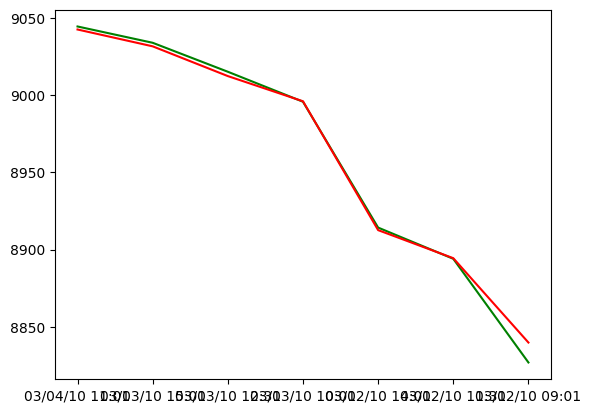

In [ ]:
plt.plot(X_test_graph, y_open_float, color='green')
plt.plot(X_test_graph, y_close_float, color='red')
plt.savefig('chat.png')

In [ ]:
plt.savefig('chat.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
X_test_graph


array(['03/04/10 11:01', '03/03/10 15:01', '03/03/10 12:31',
       '03/03/10 10:01', '03/02/10 14:01', '03/02/10 11:31',
       '03/02/10 09:01'], dtype=object)

#Training the **RNN**

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Loading data from CSV
data = pd.read_csv('/content/stock market prediction123.csv')
data

,Timestamp,Open,High,Low,Close,Volume
0,03/02/10 09:01,8826.90,8856.95,8826.90,8839.80,6316783
1,03/02/10 09:02,8840.75,8853.90,8832.80,8852.30,6316784
2,03/02/10 09:03,8855.70,8855.70,8844.65,8846.65,6316785
3,03/02/10 09:04,8843.85,8850.70,8843.75,8846.70,6316786
4,03/02/10 09:05,8846.40,8846.40,8837.75,8841.60,6316787
...,...,...,...,...,...,...
999,03/04/10 12:40,9003.70,9008.15,9003.70,9008.15,6317782
1000,03/04/10 12:41,9006.65,9010.10,9006.00,9009.10,6317783
1001,03/04/10 12:42,9009.45,9010.65,9008.45,9010.60,6317784
1002,03/04/10 12:43,9010.10,9010.95,9008.15,9010.90,6317785


In [ ]:
data['close'] = data['Close'].astype(float)
data['open'] = data['Open'].astype(float)
data['high'] = data['High'].astype(float)
data['low'] = data['Low'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  1004 non-null   object 
 1   Open       1004 non-null   float64
 2   High       1004 non-null   float64
 3   Low        1004 non-null   float64
 4   Close      1004 non-null   float64
 5   Volume     1004 non-null   int64  
 6   close      1004 non-null   float64
 7   open       1004 non-null   float64
 8   high       1004 non-null   float64
 9   low        1004 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 78.6+ KB


In [ ]:
#Data Transformation
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])
# scaled_data = data[['open', 'high', 'low', 'close', 'volume']]
scaled_data

array([[0.00000000e+00, 6.19469027e-02, 0.00000000e+00, 1.25895377e-02,
        0.00000000e+00],
       [5.77926142e-02, 4.84513274e-02, 2.47587075e-02, 6.68547862e-02,
        9.97008973e-04],
       [1.20175256e-01, 5.64159292e-02, 7.44859421e-02, 4.23268939e-02,
        1.99401795e-03],
       ...,
       [7.61735865e-01, 7.42035398e-01, 7.61854805e-01, 7.54069894e-01,
        9.98005982e-01],
       [7.64448154e-01, 7.43362832e-01, 7.60595888e-01, 7.55372260e-01,
        9.99002991e-01],
       [7.65282704e-01, 7.44469027e-01, 7.51783466e-01, 7.39960929e-01,
        1.00000000e+00]])

In [ ]:
#Function for creating time sequences
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        sequences.append(sequence)
    return np.array(sequences)

In [ ]:
#Model parameters
SEQ_LENGTH = 100
PREDICT_STEPS = 1

#Creating temporal sequences.
sequences = create_sequences(scaled_data, SEQ_LENGTH + PREDICT_STEPS)

In [ ]:
len(sequences[0])


101


*101 is 100 values and 1 is the prediction.*





In [ ]:
#Splitting into training and validation sets
X = sequences[:, :-PREDICT_STEPS]
y = sequences[:, -PREDICT_STEPS:]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
print(X_train.size)

361000


In [ ]:
#Converting data to PyTorch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).float()

In [ ]:
print(X_train.size())
print(y_train.size())

print(X_val.size())
print(y_val.size())


y_train = y_train.squeeze(1)
y_val = y_val.squeeze(1)

print(y_train.size())
print(y_val.size())

torch.Size([722, 100, 5])
torch.Size([722, 1, 5])
torch.Size([181, 100, 5])
torch.Size([181, 1, 5])
torch.Size([722, 5])
torch.Size([181, 5])


In [ ]:
#Creating an RNN model class
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
#Model initialization
input_size = 5 #Number of features in the input data (open, high, low, close, volume)
hidden_size = 100
# output_size = PREDICT_STEPS
model = SimpleRNN(input_size, hidden_size, 5)


In [ ]:
#Defining the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
#Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

Epoch [1/10], Loss: 0.37470200657844543
Epoch [2/10], Loss: 0.32634109258651733
Epoch [3/10], Loss: 0.2828044295310974
Epoch [4/10], Loss: 0.24152523279190063
Epoch [5/10], Loss: 0.20070762932300568
Epoch [6/10], Loss: 0.15962930023670197
Epoch [7/10], Loss: 0.11904647201299667
Epoch [8/10], Loss: 0.08184640854597092
Epoch [9/10], Loss: 0.0537353940308094
Epoch [10/10], Loss: 0.04182552546262741


In [ ]:
def inverse_transform(scaled_data, scaler):

    return scaler.inverse_transform(scaled_data)


In [ ]:
#Model validation
model.eval()
with torch.no_grad():
    predictions = model(X_val)
    val_loss = criterion(predictions, y_val)


    original_predictions = inverse_transform(predictions.detach().numpy(), scaler)
    true_stocks = inverse_transform(predictions.detach().numpy(), scaler)

    print('model prediction:', predictions)
    print('true values:', y_val)

    print(f'Validation Loss: {val_loss.item()}')
    print('______________________')
    print('original prediction:', original_predictions)

  #Prediction.
  #To make predictions on new data, you need to prepare a sequence of data and use model.forward()

model prediction: tensor([[0.8880, 0.6361, 0.8020, 0.7536, 0.5152],
        [0.8896, 0.6380, 0.8036, 0.7555, 0.5168],
        [0.8906, 0.6391, 0.8054, 0.7571, 0.5172],
        [0.8907, 0.6399, 0.8059, 0.7572, 0.5181],
        [0.8911, 0.6400, 0.8063, 0.7579, 0.5177],
        [0.8937, 0.6410, 0.8087, 0.7582, 0.5187],
        [0.8954, 0.6422, 0.8107, 0.7609, 0.5198],
        [0.8967, 0.6437, 0.8119, 0.7630, 0.5210],
        [0.8978, 0.6449, 0.8133, 0.7636, 0.5218],
        [0.8977, 0.6451, 0.8136, 0.7639, 0.5221],
        [0.8964, 0.6448, 0.8124, 0.7630, 0.5219],
        [0.8963, 0.6441, 0.8115, 0.7622, 0.5212],
        [0.8960, 0.6433, 0.8109, 0.7613, 0.5207],
        [0.8966, 0.6434, 0.8111, 0.7611, 0.5205],
        [0.8960, 0.6436, 0.8108, 0.7616, 0.5207],
        [0.8966, 0.6440, 0.8108, 0.7621, 0.5208],
        [0.8976, 0.6443, 0.8123, 0.7622, 0.5209],
        [0.8968, 0.6448, 0.8123, 0.7628, 0.5211],
        [0.8969, 0.6453, 0.8115, 0.7632, 0.5216],
        [0.8961, 0.6446, 0.8112,

In [ ]:
predictions.size()

torch.Size([181, 5])

In [ ]:
y_val.size()

torch.Size([181, 5])

# Plot the closing price graphs according to the model and the actual data.

In [ ]:
predictions_to_graph = inverse_transform(predictions.detach().numpy(), scaler)
predictions_to_graph

array([[   9039.714 ,    8986.715 ,    9018.026 ,    9010.483 ,
        6317299.5   ],
       [   9040.083 ,    8987.134 ,    9018.403 ,    9010.934 ,
        6317301.5   ],
       [   9040.333 ,    8987.384 ,    9018.833 ,    9011.303 ,
        6317302.    ],
       [   9040.367 ,    8987.579 ,    9018.957 ,    9011.32  ,
        6317303.    ],
       [   9040.454 ,    8987.594 ,    9019.049 ,    9011.488 ,
        6317302.5   ],
       [   9041.082 ,    8987.82  ,    9019.607 ,    9011.543 ,
        6317303.5   ],
       [   9041.485 ,    8988.083 ,    9020.095 ,    9012.182 ,
        6317304.5   ],
       [   9041.783 ,    8988.429 ,    9020.363 ,    9012.659 ,
        6317305.5   ],
       [   9042.065 ,    8988.688 ,    9020.705 ,    9012.787 ,
        6317306.5   ],
       [   9042.043 ,    8988.749 ,    9020.782 ,    9012.865 ,
        6317307.    ],
       [   9041.722 ,    8988.677 ,    9020.495 ,    9012.659 ,
        6317306.5   ],
       [   9041.702 ,    8988.527 ,    9020

In [ ]:
y_val_to_graph = inverse_transform(y_val.detach().numpy(), scaler)
y_val_to_graph

array([[   9043.899,    9044.801,    9042.25 ,    9044.   , 6317605.   ],
       [   9042.449,    9046.4  ,    9042.3  ,    9044.699, 6317606.   ],
       [   9044.15 ,    9045.2  ,    9041.1  ,    9042.9  , 6317607.   ],
       [   9043.15 ,    9045.9  ,    9042.   ,    9042.4  , 6317608.   ],
       [   9045.5  ,    9050.95 ,    9044.399,    9050.95 , 6317609.   ],
       [   9050.2  ,    9052.3  ,    9050.2  ,    9052.   , 6317610.   ],
       [   9051.351,    9052.55 ,    9050.5  ,    9051.101, 6317611.   ],
       [   9051.6  ,    9052.3  ,    9050.   ,    9051.75 , 6317612.   ],
       [   9051.3  ,    9051.3  ,    9049.25 ,    9049.899, 6317613.   ],
       [   9049.55 ,    9049.55 ,    9045.5  ,    9045.5  , 6317614.   ],
       [   9046.45 ,    9047.1  ,    9045.949,    9046.65 , 6317615.   ],
       [   9046.05 ,    9047.25 ,    9045.75 ,    9047.25 , 6317616.   ],
       [   9047.35 ,    9050.   ,    9047.101,    9050.   , 6317617.   ],
       [   9049.6  ,    9050.05 ,    9

In [ ]:
predictions_close = [stocks[-2] for stocks in predictions_to_graph]
predictions_close

[9010.483,
 9010.934,
 9011.303,
 9011.32,
 9011.488,
 9011.543,
 9012.182,
 9012.659,
 9012.787,
 9012.865,
 9012.659,
 9012.468,
 9012.262,
 9012.224,
 9012.345,
 9012.443,
 9012.469,
 9012.618,
 9012.705,
 9012.475,
 9012.149,
 9012.032,
 9012.215,
 9012.048,
 9011.697,
 9011.286,
 9011.202,
 9011.468,
 9011.718,
 9011.613,
 9011.421,
 9010.783,
 9010.346,
 9009.809,
 9009.575,
 9009.452,
 9009.213,
 9009.075,
 9009.058,
 9008.643,
 9008.314,
 9008.417,
 9008.821,
 9009.23,
 9009.458,
 9009.355,
 9009.417,
 9009.384,
 9009.643,
 9010.312,
 9011.005,
 9011.323,
 9011.427,
 9011.565,
 9011.437,
 9011.53,
 9011.391,
 9011.222,
 9011.207,
 9011.209,
 9011.477,
 9011.521,
 9011.586,
 9011.686,
 9011.575,
 9011.397,
 9011.103,
 9010.896,
 9010.923,
 9010.997,
 9010.514,
 9010.302,
 9010.05,
 9010.062,
 9010.443,
 9011.002,
 9011.395,
 9011.467,
 9011.81,
 9011.847,
 9011.657,
 9011.511,
 9011.124,
 9010.79,
 9010.637,
 9010.412,
 9010.312,
 9010.446,
 9010.645,
 9010.727,
 9010.956,
 9011

In [ ]:
y_val_close = [stocks[-2] for stocks in y_val_to_graph]
len(y_val_close)

181

In [ ]:
time = np.array([i for i in range(len(y_val_close))])

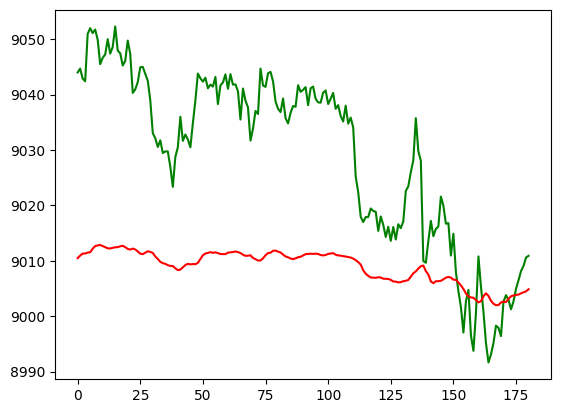

In [ ]:
plt.plot(time, y_val_close, color='green') # true
plt.plot(time, predictions_close, color='red') # model
plt.show()

#Validation on a single example.

In [ ]:
# Generate predictions for all validation data
pred = model.forward(X_val)
inverse_transform(pred.detach().numpy(), scaler)
X_val.size()
X_test = (X_val[0].unsqueeze(0))
X_test.size()
pred_test = model.forward(X_test)
pred_test # Prediction for the single example
stocks_101 = inverse_transform(pred_test.detach().numpy(), scaler)
stocks_101.tolist()  #['open', 'high', 'low', 'close', 'volume']

[[9039.7138671875, 8986.71484375, 9018.0263671875, 9010.4833984375, 6317299.5]]